In [2]:
import os
import json
import requests
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import seaborn as sns


%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
csvpath = Path('pandemic_stock_picks.csv')
ticker_data = pd.read_csv(csvpath, infer_datetime_format=True, parse_dates=True)
ticker_data.sort_index()
ticker_data.head()

,Unnamed: 0,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AMD,AMD.1,AMD.2,AMD.3,...,WING,WING.1,WING.2,WING.3,WING.4,ZM,ZM.1,ZM.2,ZM.3,ZM.4
0,NaN,open,high,low,close,volume,open,high,low,close,...,open,high,low,close,volume,open,high,low,close,volume
1,time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-06 00:00:00-05:00,174.67,175.49,173.94,174.51,17535168,23.47,23.53,22.4,22.41,...,66.66,67.0,65.84,65.87,393804,NaN,NaN,NaN,NaN,NaN
3,2019-03-07 00:00:00-05:00,174.02,174.44,172.02,172.47,20110131,22.33,22.4101,21.73,22.07,...,65.69,66.0386,64.8,65.39,280014,NaN,NaN,NaN,NaN,NaN
4,2019-03-08 00:00:00-05:00,170.32,173.07,169.5,172.92,19475688,21.35,22.085,21.035,22.0103,...,65.27,67.16,64.7244,66.65,632366,NaN,NaN,NaN,NaN,NaN


In [5]:
month_close_data = ticker_data[['AAPL.3','FB.3','AMZN.3','NFLX.3','GOOG.3','SHOP.3','NVDA.3', 'AMD.3','PEP.3','MKC.3', 'DPZ.3','WING.3','ATVI.3','COST.3','CPB.3','ETSY.3','OKTA.3','PLD.3','TTWO.3','ZM.3']].drop([0,1])
month_close_data.apply(pd.to_numeric, axis=0).head()

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,174.51,172.51,1669.16,359.50,1157.96,187.300,152.04,22.4100,116.63,136.47,248.65,65.87,42.56,219.19,36.14,70.04,79.9800,70.17,87.22,NaN
3,172.47,169.14,1626.28,352.62,1143.53,186.970,149.25,22.0700,116.08,135.66,247.83,65.39,41.42,216.79,35.92,67.23,81.2200,69.52,88.41,NaN
4,172.92,169.60,1622.11,349.58,1142.74,189.730,150.67,22.0103,115.22,137.05,250.53,66.65,42.04,227.82,36.01,67.80,78.4250,69.94,87.04,NaN
5,178.98,171.98,1670.32,358.86,1175.81,200.300,161.13,22.9500,116.56,139.05,246.98,66.81,42.92,229.63,35.90,70.64,80.9101,70.99,89.80,NaN
6,180.94,171.94,1672.42,356.28,1192.72,202.545,162.51,23.4800,116.61,138.41,240.36,66.87,42.63,232.98,35.06,71.14,80.6500,71.64,89.86,NaN


In [7]:
stock_list = month_close_data.astype(str).astype(float).loc[255:276]
stock_list.columns = ['AAPL','FB','AMZN','NFLX','GOOG','SHOP','NVDA', 'AMD','PEP','MKC', 'DPZ','WING','ATVI','COST','CPB','ETSY','OKTA','PLD','TTWO','ZM']
stock_list.head()

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,DPZ,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM
255,288.98,181.11,1901.14,368.90,1298.41,472.0877,266.070,48.600,137.27,150.54,336.47,79.28,59.960,311.340,51.750,60.61,125.99,85.83,117.71,114.3300
256,266.09,168.60,1800.01,346.03,1214.51,417.6100,245.010,43.260,130.15,143.87,336.26,74.76,57.165,300.945,50.190,58.50,114.86,77.76,113.83,113.7500
257,285.69,178.19,1894.00,364.27,1281.01,450.1700,261.080,45.380,134.23,151.49,344.05,76.17,60.720,309.670,51.250,57.97,119.21,80.86,118.75,108.4858
258,275.30,170.22,1819.63,349.59,1215.10,422.2300,246.160,45.690,129.66,146.61,332.66,71.57,59.330,297.270,50.475,50.21,114.77,73.72,118.90,110.2600
259,248.00,154.46,1676.21,312.63,1113.84,377.5200,216.035,39.005,115.34,131.17,315.61,68.26,54.560,279.635,47.660,44.04,106.08,70.17,108.35,109.4700


In [8]:
stock_list['Date'] = pd.date_range(start='03/06/2020', periods=len(stock_list), freq='B')
stock_list_final = stock_list[['Date','AAPL','FB','AMZN','NFLX','GOOG','SHOP','NVDA', 'AMD','PEP','MKC', 'DPZ','WING','ATVI','COST','CPB','ETSY','OKTA','PLD','TTWO','ZM']]
stock_list_final.reset_index()
stocks = stock_list_final.set_index('Date')
stocks.head()

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,DPZ,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,288.98,181.11,1901.14,368.90,1298.41,472.0877,266.070,48.600,137.27,150.54,336.47,79.28,59.960,311.340,51.750,60.61,125.99,85.83,117.71,114.3300
2020-03-09,266.09,168.60,1800.01,346.03,1214.51,417.6100,245.010,43.260,130.15,143.87,336.26,74.76,57.165,300.945,50.190,58.50,114.86,77.76,113.83,113.7500
2020-03-10,285.69,178.19,1894.00,364.27,1281.01,450.1700,261.080,45.380,134.23,151.49,344.05,76.17,60.720,309.670,51.250,57.97,119.21,80.86,118.75,108.4858
2020-03-11,275.30,170.22,1819.63,349.59,1215.10,422.2300,246.160,45.690,129.66,146.61,332.66,71.57,59.330,297.270,50.475,50.21,114.77,73.72,118.90,110.2600
2020-03-12,248.00,154.46,1676.21,312.63,1113.84,377.5200,216.035,39.005,115.34,131.17,315.61,68.26,54.560,279.635,47.660,44.04,106.08,70.17,108.35,109.4700


In [37]:
daily_returns = (stocks.pct_change())*100
daily_returns

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,DPZ,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,-7.920963,-6.907404,-5.319440,-6.199512,-6.461749,-11.539741,-7.915210,-10.987654,-5.186858,-4.430716,-0.062413,-5.701312,-4.661441,-3.338794,-3.014493,-3.481274,-8.834034,-9.402307,-3.296237,-0.507303
2020-03-10,7.365929,5.688019,5.221638,5.271219,5.475459,7.796748,6.558916,4.900601,3.134844,5.296448,2.316660,1.886035,6.218840,2.899201,2.111974,-0.905983,3.787219,3.986626,4.322235,-4.627868
2020-03-11,-3.636809,-4.472754,-3.926610,-4.029978,-5.145159,-6.206544,-5.714723,0.683120,-3.404604,-3.221335,-3.310565,-6.039123,-2.289196,-4.004263,-1.512195,-13.386234,-3.724520,-8.830077,0.126316,1.635421
2020-03-12,-9.916455,-9.258607,-7.881822,-10.572385,-8.333470,-10.589015,-12.237975,-14.631210,-11.044270,-10.531342,-5.125353,-4.624843,-8.039778,-5.932317,-5.577018,-12.288389,-7.571665,-4.815518,-8.873003,-0.716488
2020-03-13,12.120968,10.462256,6.568389,7.571250,9.509445,3.522992,11.477307,12.549673,10.499393,2.919875,0.323184,-0.307647,8.211144,8.244676,3.378095,11.285195,0.886124,10.887844,7.632672,-1.799580
2020-03-16,-13.159030,-14.453171,-5.503524,-11.733571,-11.048075,-17.534927,-18.369804,-11.822323,-11.282856,-10.837037,-9.752708,-15.473916,-10.636856,-6.445538,0.060889,-15.017343,-10.194356,-17.272844,-7.391528,0.446512
2020-03-17,4.712801,2.370512,7.072275,7.714627,3.206452,10.143039,10.514268,8.189098,12.956576,15.219739,4.521435,9.735744,6.444276,8.411611,9.208925,1.116447,13.599001,9.833773,7.833333,2.833858
2020-03-18,-1.522642,-1.586133,1.383771,-0.753768,-1.888747,-5.186208,-6.328823,-6.566380,-0.876918,1.708847,-2.390598,-21.245247,-0.730057,0.179153,-6.222140,-6.802802,-6.521341,-4.045262,-8.449253,6.988653


<AxesSubplot:xlabel='Date'>

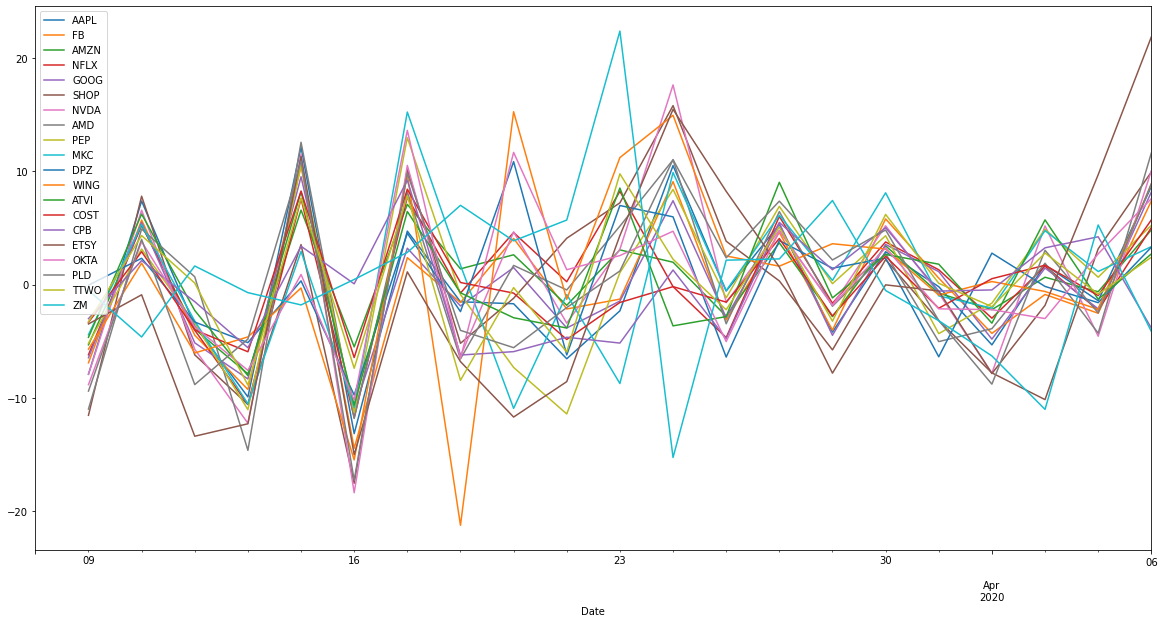

In [55]:
daily_returns.plot(figsize= (20,10))

In [35]:
cum_returns = ((1+daily_returns).cumprod()-1)*100
cum_returns

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,DPZ,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,-7.920963,-6.907404,-5.319440,-6.199512,-6.461749,-11.539741,-7.915210,-10.987654,-5.186858,-4.430716,-0.062413,-5.701312,-4.661441,-3.338794,-3.014493,-3.481274,-8.834034,-9.402307,-3.296237,-0.507303
2020-03-10,-1.138487,-1.612280,-0.375564,-1.255083,-1.340101,-4.642718,-1.875446,-6.625514,-2.214614,0.631062,2.252801,-3.922805,1.267512,-0.536391,-0.966184,-4.355717,-5.381379,-5.790516,0.883527,-5.111694
2020-03-11,-4.733892,-6.012920,-4.287428,-5.234481,-6.416309,-10.561110,-7.482993,-5.987654,-5.543819,-2.610602,-1.132345,-9.725025,-1.050700,-4.519175,-2.463768,-17.158885,-8.905469,-14.109286,1.010959,-3.559871
2020-03-12,-14.180912,-14.714814,-11.831322,-15.253456,-14.215078,-20.031808,-18.805202,-19.742798,-15.975814,-12.867012,-6.199661,-13.900101,-9.006004,-10.183401,-7.903382,-27.338723,-15.802841,-18.245369,-7.951746,-4.250853
2020-03-13,-3.778808,-5.792060,-6.040060,-8.837083,-6.057409,-17.214535,-9.486225,-9.670782,-7.153785,-10.322838,-5.896514,-14.164985,-1.534356,-2.778313,-4.792271,-19.138756,-15.056751,-9.344052,-0.926005,-5.973935
2020-03-16,-16.440584,-19.408095,-11.211168,-19.533749,-16.436257,-31.730905,-26.113429,-20.349794,-17.629489,-20.041185,-15.074152,-27.447023,-12.008005,-9.044774,-4.734300,-31.281967,-23.716168,-25.002913,-8.249087,-5.554098
2020-03-17,-12.502595,-17.497653,-4.931778,-13.326078,-13.756826,-24.806344,-18.344796,-13.827160,-6.957092,-7.871662,-11.234285,-20.383451,-6.337558,-1.393974,4.038647,-30.514767,-13.342329,-17.627869,-1.061932,-2.877635
2020-03-18,-13.834867,-18.806250,-3.616251,-13.979398,-15.385741,-28.706043,-23.512609,-19.485597,-7.773002,-6.297330,-13.356317,-37.298184,-7.021348,-1.217319,-2.434783,-35.241709,-18.993571,-20.960037,-9.421460,3.909910


In [54]:
cum_returns.loc['2020-04-06'].mean()

-2.899121240618675

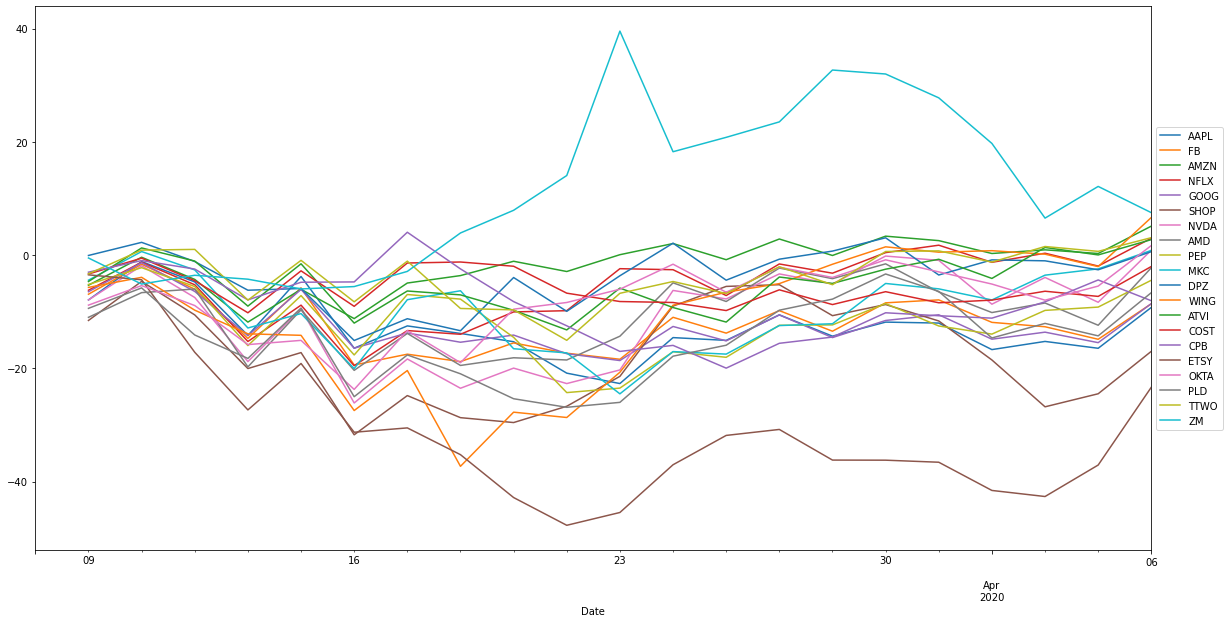

In [52]:
cum_returns.plot(figsize=(20,10)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


In [40]:
standard_deviation = cum_returns.std()
standard_deviation

AAPL     5.269905
FB       4.945427
AMZN     4.447643
NFLX     6.164503
GOOG     4.369203
SHOP     8.781906
NVDA     8.526295
AMD      6.182621
PEP      6.063874
MKC      7.101463
DPZ      5.136816
WING    12.091385
ATVI     4.717226
COST     3.130782
CPB      6.075072
ETSY    12.087030
OKTA     6.328953
PLD      7.235761
TTWO     4.769317
ZM      14.284387
dtype: float64

<AxesSubplot:>

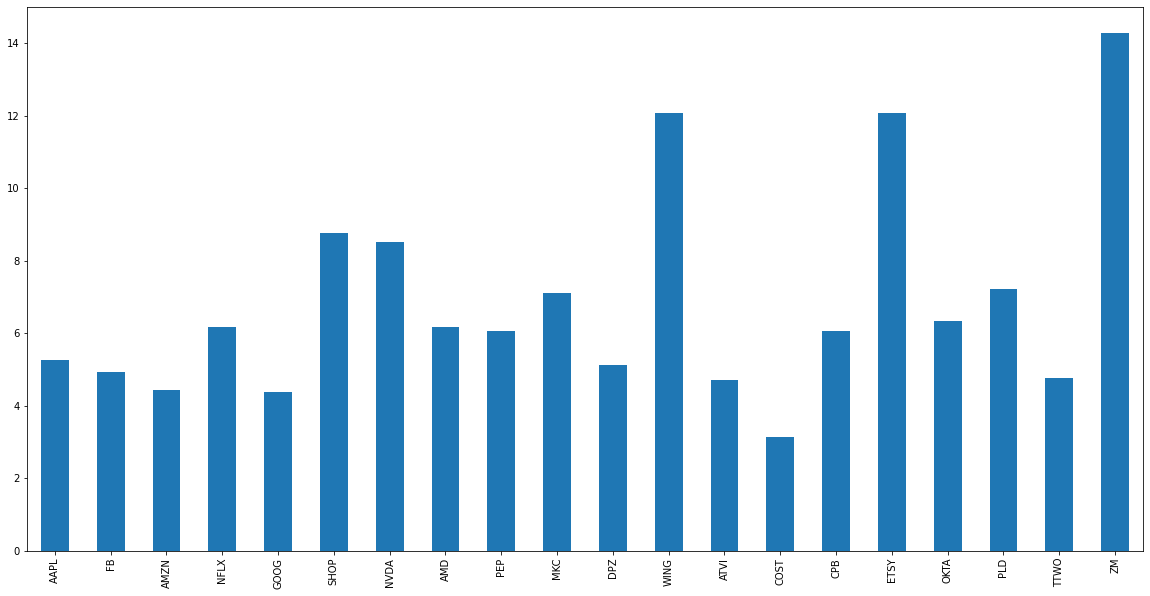

In [41]:
standard_deviation.plot(kind='bar', figsize=(20,10))


In [16]:
sp500_file = Path('Resources/snp_data_5Y.csv')
sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500 = sp500_df.drop(columns=['Volume','Open','High','Low'])
sp500.columns = ['S&P 500']
sp500.head()

,S&P 500
Date,
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05


In [33]:
sp500_1month = sp500.loc[['2020-03-06','2020-04-07']]
sp500_1month

,S&P 500
Date,
2020-03-06,2972.37
2020-04-07,2659.41


In [42]:
(sp500_1month.pct_change())*100

,S&P 500
Date,
2020-03-06,NaN
2020-04-07,-10.528972


In [43]:
combined_df = pd.concat([stocks, sp500], axis='columns', join='inner')
combined_df.head()

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,...,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,288.98,181.11,1901.14,368.90,1298.41,472.0877,266.070,48.600,137.27,150.54,...,79.28,59.960,311.340,51.750,60.61,125.99,85.83,117.71,114.3300,2972.37
2020-03-09,266.09,168.60,1800.01,346.03,1214.51,417.6100,245.010,43.260,130.15,143.87,...,74.76,57.165,300.945,50.190,58.50,114.86,77.76,113.83,113.7500,2746.56
2020-03-10,285.69,178.19,1894.00,364.27,1281.01,450.1700,261.080,45.380,134.23,151.49,...,76.17,60.720,309.670,51.250,57.97,119.21,80.86,118.75,108.4858,2882.23
2020-03-11,275.30,170.22,1819.63,349.59,1215.10,422.2300,246.160,45.690,129.66,146.61,...,71.57,59.330,297.270,50.475,50.21,114.77,73.72,118.90,110.2600,2741.38
2020-03-12,248.00,154.46,1676.21,312.63,1113.84,377.5200,216.035,39.005,115.34,131.17,...,68.26,54.560,279.635,47.660,44.04,106.08,70.17,108.35,109.4700,2480.64


In [44]:
price_correlation = combined_df.corr()
price_correlation.head()

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,...,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM,S&P 500
AAPL,1.000000,0.879979,0.016223,0.233479,0.969647,0.613038,0.563633,0.544225,0.856288,0.683700,...,0.375935,0.585282,0.647546,0.559307,0.895431,0.173914,0.734338,0.581365,-0.527899,0.959794
FB,0.879979,1.000000,0.310214,0.587005,0.943335,0.783558,0.798552,0.748390,0.699697,0.653516,...,0.652898,0.668753,0.422578,0.250569,0.762223,0.524529,0.838213,0.661012,-0.202736,0.929164
AMZN,0.016223,0.310214,1.000000,0.879557,0.122986,0.408000,0.680885,0.703009,0.134616,0.280976,...,0.577784,0.476228,0.084450,-0.394169,-0.189241,0.878949,0.440702,0.445675,0.632519,0.144905
NFLX,0.233479,0.587005,0.879557,1.000000,0.370591,0.572548,0.860706,0.818690,0.296895,0.467302,...,0.821251,0.715821,0.043673,-0.272456,0.079328,0.915676,0.661473,0.671009,0.497970,0.404446
GOOG,0.969647,0.943335,0.122986,0.370591,1.000000,0.661961,0.627576,0.595237,0.808299,0.678376,...,0.451537,0.620737,0.631269,0.489431,0.893747,0.315708,0.750579,0.590641,-0.447035,0.966030


<AxesSubplot:>

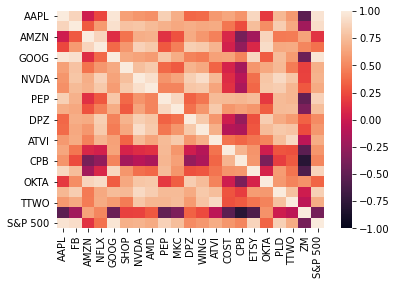

In [45]:
sns.heatmap(price_correlation, vmin=-1,vmax=1)

<AxesSubplot:xlabel='Date'>

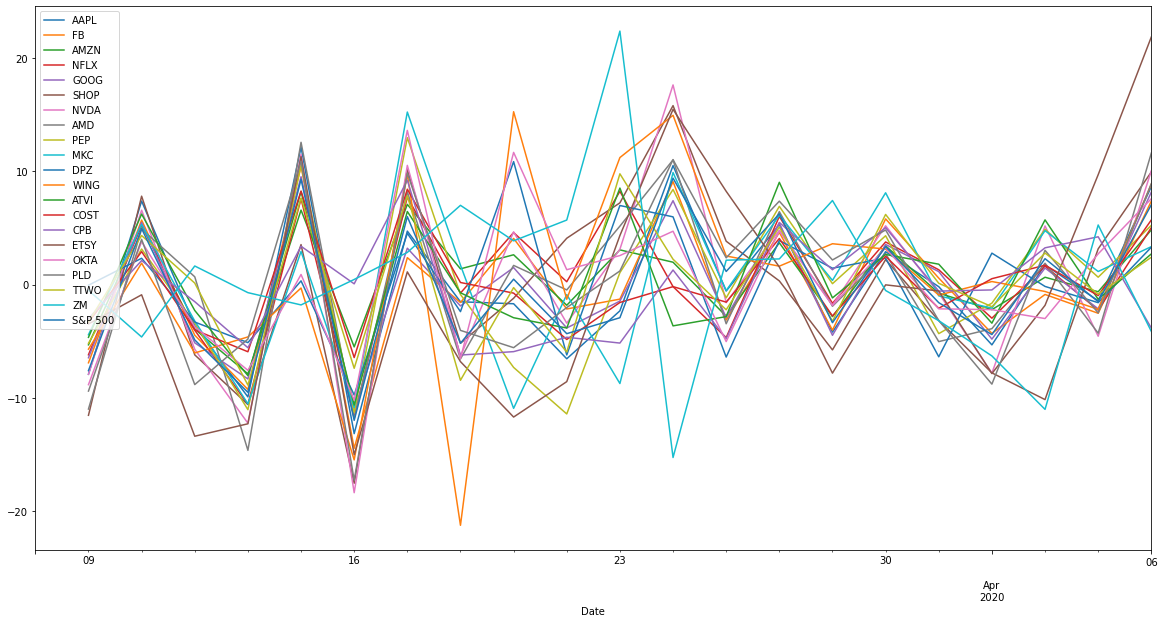

In [46]:
combined_daily_returns = (combined_df.pct_change())*100
combined_daily_returns.plot(figsize=(20,10))

In [47]:
correlation = combined_daily_returns.corr()
correlation.head()

,AAPL,FB,AMZN,NFLX,GOOG,SHOP,NVDA,AMD,PEP,MKC,...,WING,ATVI,COST,CPB,ETSY,OKTA,PLD,TTWO,ZM,S&P 500
AAPL,1.000000,0.944261,0.852511,0.756911,0.974543,0.759049,0.924885,0.885816,0.866597,0.740155,...,0.506555,0.714584,0.842148,0.453653,0.765186,0.630575,0.888136,0.722899,-0.353235,0.971438
FB,0.944261,1.000000,0.867097,0.826935,0.976768,0.775461,0.932016,0.880541,0.739777,0.639516,...,0.597125,0.674659,0.780142,0.334958,0.668892,0.729854,0.837081,0.701737,-0.267957,0.935558
AMZN,0.852511,0.867097,1.000000,0.933087,0.889462,0.722297,0.841486,0.863763,0.797040,0.642939,...,0.495861,0.819357,0.888530,0.451352,0.569965,0.792185,0.764327,0.794623,-0.011562,0.845286
NFLX,0.756911,0.826935,0.933087,1.000000,0.823466,0.685688,0.815932,0.841334,0.698423,0.522230,...,0.585879,0.891306,0.781830,0.348095,0.483996,0.793606,0.729731,0.835386,0.153723,0.767419
GOOG,0.974543,0.976768,0.889462,0.823466,1.000000,0.742410,0.933317,0.886953,0.800092,0.679394,...,0.553474,0.730969,0.838583,0.410626,0.724054,0.702212,0.863923,0.730426,-0.320379,0.960686


<AxesSubplot:>

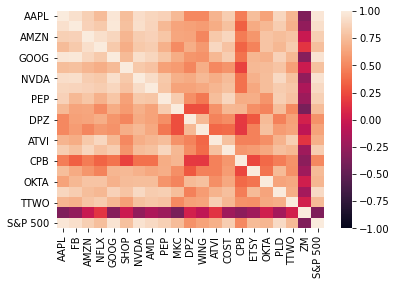

In [48]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [49]:
AAPLcovariance = combined_daily_returns['AAPL'].cov(combined_daily_returns['S&P 500'])
FBcovariance = combined_daily_returns['FB'].cov(combined_daily_returns['S&P 500'])
AMZNcovariance = combined_daily_returns['AMZN'].cov(combined_daily_returns['S&P 500'])
NFLXcovariance = combined_daily_returns['NFLX'].cov(combined_daily_returns['S&P 500'])
GOOGcovariance = combined_daily_returns['GOOG'].cov(combined_daily_returns['S&P 500'])
SHOPcovariance = combined_daily_returns['SHOP'].cov(combined_daily_returns['S&P 500'])
NVDAcovariance = combined_daily_returns['NVDA'].cov(combined_daily_returns['S&P 500'])
AMDcovariance = combined_daily_returns['AMD'].cov(combined_daily_returns['S&P 500'])
PEPcovariance = combined_daily_returns['PEP'].cov(combined_daily_returns['S&P 500'])
MKCcovariance = combined_daily_returns['MKC'].cov(combined_daily_returns['S&P 500'])
DPZcovariance = combined_daily_returns['DPZ'].cov(combined_daily_returns['S&P 500'])
WINGcovariance = combined_daily_returns['WING'].cov(combined_daily_returns['S&P 500'])
ATVIcovariance = combined_daily_returns['ATVI'].cov(combined_daily_returns['S&P 500'])
COSTcovariance = combined_daily_returns['COST'].cov(combined_daily_returns['S&P 500'])
CPBcovariance = combined_daily_returns['CPB'].cov(combined_daily_returns['S&P 500'])
ETSYcovariance = combined_daily_returns['ETSY'].cov(combined_daily_returns['S&P 500'])
OKTAcovariance = combined_daily_returns['OKTA'].cov(combined_daily_returns['S&P 500'])
PLDcovariance = combined_daily_returns['PLD'].cov(combined_daily_returns['S&P 500'])
TTWOcovariance = combined_daily_returns['TTWO'].cov(combined_daily_returns['S&P 500'])
ZMcovariance = combined_daily_returns['ZM'].cov(combined_daily_returns['S&P 500'])


In [50]:
AAPLvariance = combined_daily_returns['AAPL'].var()
FBvariance = combined_daily_returns['FB'].var()
AMZNvariance = combined_daily_returns['AMZN'].var()
NFLXvariance = combined_daily_returns['NFLX'].var()
GOOGvariance = combined_daily_returns['GOOG'].var()
SHOPvariance = combined_daily_returns['SHOP'].var()
NVDAvariance = combined_daily_returns['NVDA'].var()
AMDvariance = combined_daily_returns['AMD'].var()
PEPvariance = combined_daily_returns['PEP'].var()
MKCvariance = combined_daily_returns['MKC'].var()
DPZvariance = combined_daily_returns['DPZ'].var()
WINGvariance = combined_daily_returns['WING'].var()
ATVIvariance = combined_daily_returns['ATVI'].var()
COSTvariance = combined_daily_returns['COST'].var()
CPBvariance = combined_daily_returns['CPB'].var()
ETSYvariance = combined_daily_returns['ETSY'].var()
OKTAvariance = combined_daily_returns['OKTA'].var()
PLDvariance = combined_daily_returns['PLD'].var()
TTWOvariance = combined_daily_returns['TTWO'].var()
ZMvariance = combined_daily_returns['ZM'].var()


In [51]:
AAPLbeta = AAPLcovariance / AAPLvariance
print(f'Beta of AAPL is {AAPLbeta}')

FBbeta = FBcovariance / FBvariance
print(f'Beta of FB is {FBbeta}')

AMZNbeta = AMZNcovariance / AMZNvariance
print(f'Beta of AMZN is {AMZNbeta}')

NFLXbeta = NFLXcovariance / NFLXvariance
print(f'Beta of NFLX is {NFLXbeta}')

GOOGbeta = GOOGcovariance / GOOGvariance
print(f'Beta of GOOG is {GOOGbeta}')

SHOPbeta = SHOPcovariance / SHOPvariance
print(f'Beta of SHOP is {SHOPbeta}')

NVDAbeta = NVDAcovariance / NVDAvariance
print(f'Beta of NVDA is {NVDAbeta}')

AMDbeta = AMDcovariance / AMDvariance
print(f'Beta of AMD is {AMDbeta}')

PEPbeta = PEPcovariance / PEPvariance
print(f'Beta of PEP is {PEPbeta}')

MKCbeta = MKCcovariance / MKCvariance
print(f'Beta of MKC is {MKCbeta}')

DPZbeta = DPZcovariance / DPZvariance
print(f'Beta of DPZ is {DPZbeta}')

WINGbeta = WINGcovariance / WINGvariance
print(f'Beta of WING is {WINGbeta}')

ATVIbeta = ATVIcovariance / ATVIvariance
print(f'Beta of ATVI is {ATVIbeta}')

COSTbeta =  COSTcovariance / COSTvariance
print(f'Beta of COST is {COSTbeta}')

CPBbeta = CPBcovariance / CPBvariance
print(f'Beta of CPB is {CPBbeta}')

ETSYbeta = ETSYcovariance / ETSYvariance
print(f'Beta of ETSY is {ETSYbeta}')

OKTAbeta = OKTAcovariance / OKTAvariance
print(f'Beta of OKTA is {OKTAbeta}')

PLDbeta = PLDcovariance / PLDvariance
print(f'Beta of PLD is {PLDbeta}')

TTWObeta = TTWOcovariance / TTWOvariance
print(f'Beta of TTWO is {TTWObeta}')

ZMbeta = ZMcovariance / ZMvariance
print(f'Beta of ZM is {ZMbeta}')


Beta of AAPL is 0.8854473279936843
Beta of FB is 0.9152594804938919
Beta of AMZN is 1.2319978605956026
Beta of NFLX is 0.8182866431520177
Beta of GOOG is 1.0405780767706274
Beta of SHOP is 0.5594725918601133
Beta of NVDA is 0.664449303145599
Beta of AMD is 0.7184562124635975
Beta of PEP is 0.7511441497594239
Beta of MKC is 0.6635899336450993
Beta of DPZ is 0.6574522325110049
Beta of WING is 0.43239335846536775
Beta of ATVI is 0.7648170930697488
Beta of COST is 1.2240144478561297
Beta of CPB is 0.7014860293179745
Beta of ETSY is 0.46042540518379466
Beta of OKTA is 0.6909799724266159
Beta of PLD is 0.7296297269758868
Beta of TTWO is 0.8437490177628896
Beta of ZM is -0.2881727531292944
